# E-Commerce Customer Purchase Analysis

# Objective:
# To understand customer purchase behavior, preferences, and trends in an e-commerce setting, enabling better decision-making for targeted marketing and sales strategies.

# Loading Liabraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
ecommerce=pd.read_csv("ecom.csv")
ecommerce

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,295864,5407639888,Other,25-45,23/02/2020 10:42:04,Electronics,Yes,SEASONALOFFER21,110.89,2819.907300,2709.017300,Debit Card,Other
54996,706435,1144029904,Other,18-25,12/07/2021 15:59:21,Electronics,Yes,SEASONALOFFER21,488.59,3891.303900,3402.713900,Cash on Delivery,Bangalore
54997,649435,9587323189,Male,45-60,02/08/2024 09:30:44,Home & Kitchen,Yes,NEWYEARS,417.63,4094.687500,3677.057500,Credit Card,Mumbai
54998,982183,5032564481,Female,45-60,05/08/2020 23:57:56,Beauty and Health,Yes,SEASONALOFFER21,204.56,3977.473500,3772.913500,Credit Card,Kolkata


In [6]:
#Exploratory Data Analysis and Cleaning
ecommerce.isnull().sum()

CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64

In [7]:
ecommerce.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
54995    False
54996    False
54997    False
54998    False
54999    False
Length: 55000, dtype: bool

In [8]:
ecommerce.describe()

,CID,TID,Discount Amount (INR),Gross Amount,Net Amount
count,55000.000000,5.500000e+04,55000.000000,55000.000000,55000.000000
mean,551245.593891,5.504740e+09,136.986796,3012.936606,2875.949810
std,260603.330337,2.594534e+09,165.375502,1718.431066,1726.127778
min,100009.000000,1.000163e+09,0.000000,136.454325,-351.119775
25%,323717.000000,3.252604e+09,0.000000,1562.111325,1429.551863
50%,550088.500000,5.498383e+09,0.000000,2954.266150,2814.910875
75%,776955.750000,7.747933e+09,274.115000,4342.221675,4211.407838
max,999996.000000,9.999393e+09,500.000000,8394.825600,8394.825600


In [9]:
ecommerce.shape

(55000, 13)

In [10]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


In [11]:
print("select specific column:")
print(ecommerce[["CID","location"]])

select specific column:
          CID   Location
0      943146  Ahmedabad
1      180079  Bangalore
2      337580      Delhi
3      180333      Delhi
4      447553      Delhi
...       ...        ...
54995  295864      Other
54996  706435  Bangalore
54997  649435     Mumbai
54998  982183    Kolkata
54999  126691     Mumbai

[55000 rows x 2 columns]


In [12]:
ecommerce.groupby('location')['CID'].count()

Location
Ahmedabad     2785
Bangalore     8249
Chennai       4368
Dehradun       553
Delhi        10799
Hyderabad     5545
Jaipur        1678
Kolkata       2709
Lucknow       1136
Mumbai       11197
Other         1046
Pune          3781
Srinagar       548
Varanasi       606
Name: CID, dtype: int64

In [13]:
ecommerce.tail()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
54995,295864,5407639888,Other,25-45,23/02/2020 10:42:04,Electronics,Yes,SEASONALOFFER21,110.89,2819.9073,2709.0173,Debit Card,Other
54996,706435,1144029904,Other,18-25,12/07/2021 15:59:21,Electronics,Yes,SEASONALOFFER21,488.59,3891.3039,3402.7139,Cash on Delivery,Bangalore
54997,649435,9587323189,Male,45-60,02/08/2024 09:30:44,Home & Kitchen,Yes,NEWYEARS,417.63,4094.6875,3677.0575,Credit Card,Mumbai
54998,982183,5032564481,Female,45-60,05/08/2020 23:57:56,Beauty and Health,Yes,SEASONALOFFER21,204.56,3977.4735,3772.9135,Credit Card,Kolkata
54999,126691,9172953722,Male,25-45,21/07/2022 09:05:18,Beauty and Health,Yes,NEWYEARS,380.81,3703.5819,3322.7719,Credit Card,Mumbai


In [14]:
ecommerce.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [15]:
ecommerce.iloc[:51]

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi
5,200614,3994452858,Male,18-25,12/07/2021 15:10:27,Clothing,Yes,FESTIVE50,127.01,3649.397400,3522.387400,Credit Card,Delhi
6,668787,9460023916,Male,25-45,08/10/2023 16:59:52,Electronics,No,NaN,0.00,5593.935600,5593.935600,PhonePe UPI,Delhi
7,933551,6877673032,Female,18-25,14/12/2022 20:13:45,Electronics,No,NaN,0.00,1901.796400,1901.796400,Credit Card,Delhi
8,414167,2841266620,Male,18-25,29/04/2020 09:10:46,Pet Care,No,NaN,0.00,3961.671000,3961.671000,Debit Card,Delhi
9,889269,1342270638,Other,60 and above,18/12/2023 19:04:02,Clothing,Yes,SAVE10,437.50,1497.350400,1059.850400,Credit Card,Bangalore


In [16]:
ecommerce.describe(include = 'object')

,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Purchase Method,Location
count,55000,55000,55000,55000,55000,27415,55000,55000
unique,3,5,54988,9,2,5,8,14
top,Female,25-45,04/07/2022 11:45:29,Electronics,No,NEWYEARS,Credit Card,Mumbai
freq,18454,22010,2,16574,27585,8135,22096,11197


In [17]:
for col in ecommerce.describe(include = 'object'):
    print(col)
    print(ecommerce[col].unique())
    print('-'*50)

Gender
['Female' 'Male' 'Other']
--------------------------------------------------
Age Group
['25-45' '60 and above' '18-25' '45-60' 'under 18']
--------------------------------------------------
Purchase Date
['30/08/2023 20:27:08' '23/02/2024 09:33:46' '06/03/2022 09:09:50' ...
 '02/08/2024 09:30:44' '05/08/2020 23:57:56' '21/07/2022 09:05:18']
--------------------------------------------------
Product Category
['Electronics' 'Clothing' 'Sports & Fitness' 'Pet Care' 'Home & Kitchen'
 'Books' 'Beauty and Health' 'Other' 'Toys & Games']
--------------------------------------------------
Discount Availed
['Yes' 'No']
--------------------------------------------------
Discount Name
['FESTIVE50' 'SEASONALOFFER21' nan 'WELCOME5' 'SAVE10' 'NEWYEARS']
--------------------------------------------------
Purchase Method
['Credit Card' 'Debit Card' 'PhonePe UPI' 'Google Pay UPI' 'Net Banking'
 'Cash on Delivery' 'Paytm UPI' 'International Card']
-------------------------------------------------

In [7]:
ecommerce.columns = ecommerce.columns.str.lower() #converting column names into lower case for better understanding
ecommerce.head()

,cid,tid,gender,age group,purchase date,product category,discount availed,discount name,discount amount (inr),gross amount,net amount,purchase method,location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [9]:
ecommerce['purchase date'] = pd.to_datetime(ecommerce['purchase date']) # changing datatype from object into datatime formatt
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cid                    55000 non-null  int64         
 1   tid                    55000 non-null  int64         
 2   gender                 55000 non-null  object        
 3   age group              55000 non-null  object        
 4   purchase date          55000 non-null  datetime64[ns]
 5   product category       55000 non-null  object        
 6   discount availed       55000 non-null  object        
 7   discount name          27415 non-null  object        
 8   discount amount (inr)  55000 non-null  float64       
 9   gross amount           55000 non-null  float64       
 10  net amount             55000 non-null  float64       
 11  purchase method        55000 non-null  object        
 12  location               55000 non-null  object        
dtypes

# Data Analysis & Visualization

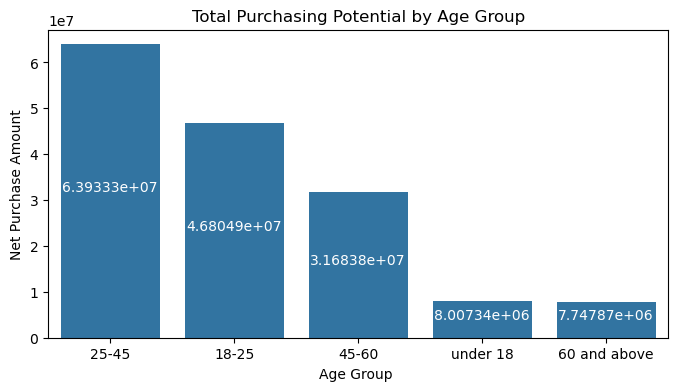

In [40]:
#What is the age group with the highest purchasing potential?
age_group_purchase_amount = ecommerce.groupby('age group')['net amount'].sum().reset_index()
age_group_purchase_amount = age_group_purchase_amount.sort_values(by = ['net amount'], ascending = False)

plt.figure(figsize=(8,4))

a =  sns . barplot(age_group_purchase_amount, x = 'age group', y = 'net amount')
plt.title('Total Purchasing Potential by Age Group')
plt.xlabel('Age Group ')
plt.ylabel('Net Purchase Amount')

for bar in a.containers:
    a.bar_label(bar, label_type = 'center', padding = 3, color = 'w')    
plt.show()

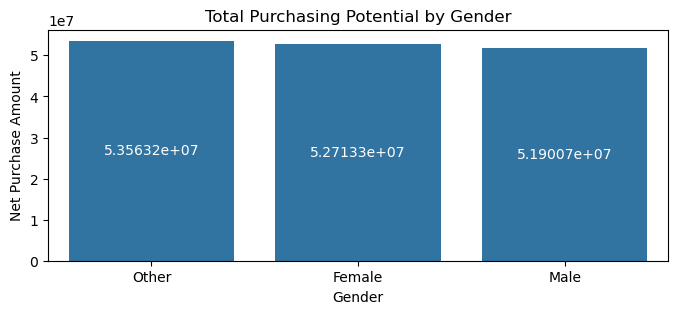

In [13]:
#Which gender shows higher purchasing activity? gender and net amount?
gender_purchasing_power = ecommerce.groupby('gender')['net amount'].sum().reset_index()
gender_purchasing_power = gender_purchasing_power.sort_values(by = ['net amount'], ascending = False)

plt.figure(figsize=(8,3))

a = sns.barplot(gender_purchasing_power, x='gender', y='net amount', )
plt.title('Total Purchasing Potential by Gender')
plt.xlabel('Gender')
plt.ylabel('Net Purchase Amount')

for bars in a.containers:
    a.bar_label(bars, label_type = 'center', color = 'w')
    
plt.show()

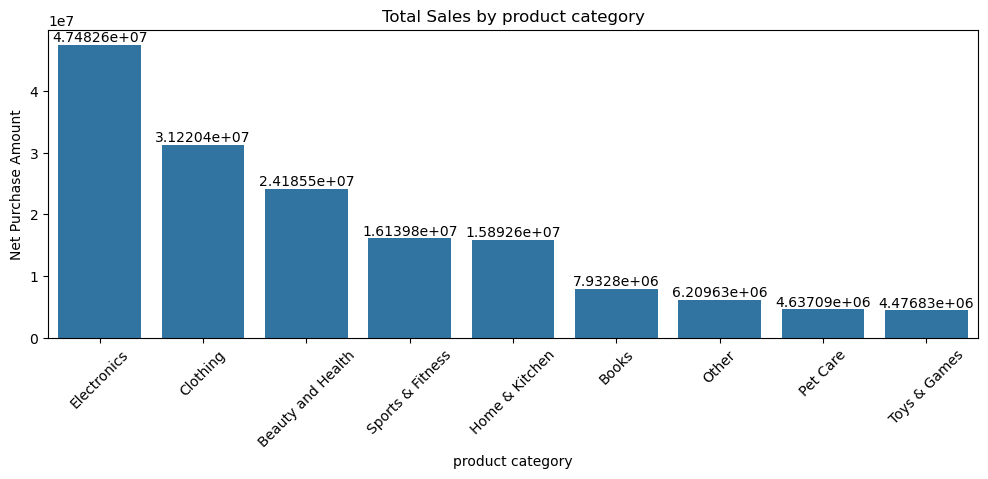

In [44]:
#What are the top-selling product categories?
category_sales = ecommerce.groupby('product category')['net amount'].sum().reset_index()
category_sales = category_sales.sort_values(by = ['net amount'], ascending = False)

plt.figure(figsize=(12,4))

a = sns.barplot(category_sales, x='product category', y='net amount', width = 0.8)
plt.title('Total Sales by product category')
plt.xlabel('product category')
plt.xticks(rotation =45)
plt.ylabel('Net Purchase Amount')

for bars in a.containers:
    a.bar_label(bars)

plt.show()

In [50]:
#Which location generates the most revenue?
Location_sales = ecommerce.groupby('location')['net amount'].sum().reset_index()
Location_sales = Location_sales.sort_values(by = ['net amount'], ascending = False)
Location_sales

,location,net amount
9,Mumbai,3.208384e+07
4,Delhi,3.109897e+07
1,Bangalore,2.361955e+07
5,Hyderabad,1.581339e+07
2,Chennai,1.263518e+07
11,Pune,1.090214e+07
0,Ahmedabad,8.114984e+06
7,Kolkata,7.805355e+06
6,Jaipur,4.854492e+06
8,Lucknow,3.270708e+06


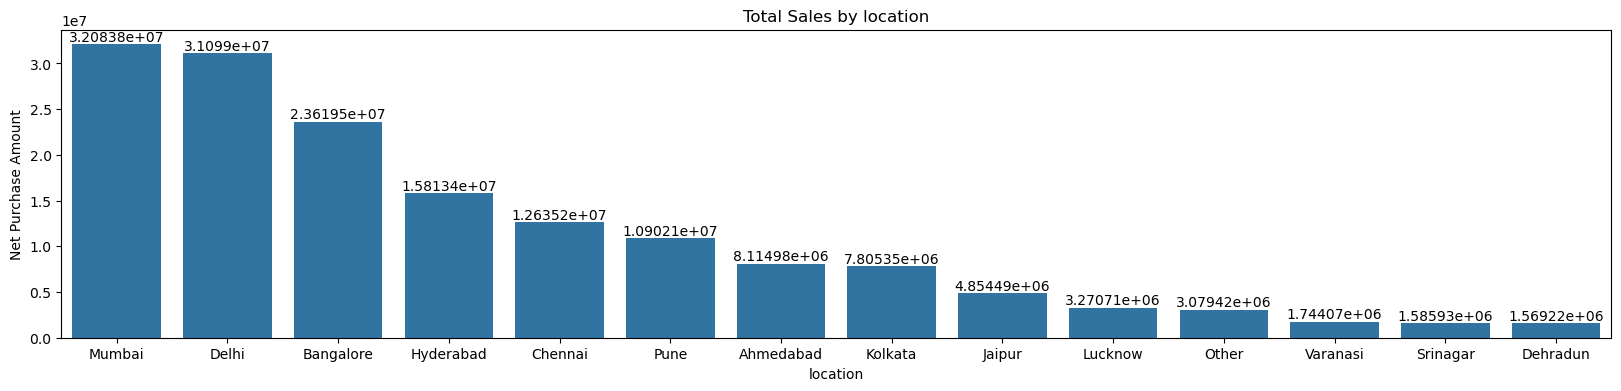

In [52]:
#Which location generates the most revenue?
plt.figure(figsize=(20,4))

a = sns.barplot(Location_sales, x='location', y='net amount')
plt.title('Total Sales by location')
plt.xlabel('location')
plt.ylabel('Net Purchase Amount')

for bars in a.containers:
    a.bar_label(bars)

plt.show()

In [15]:
#Do discounts impact the purchasing behavior significantly?
discounted_sales = ecommerce.groupby(ecommerce['discount availed']=='Yes')['net amount'].mean().reset_index()
discounted_sales = discounted_sales.sort_values(by = 'net amount', ascending = False)
discounted_sales

,discount availed,net amount
0,False,3013.379444
1,True,2737.667978


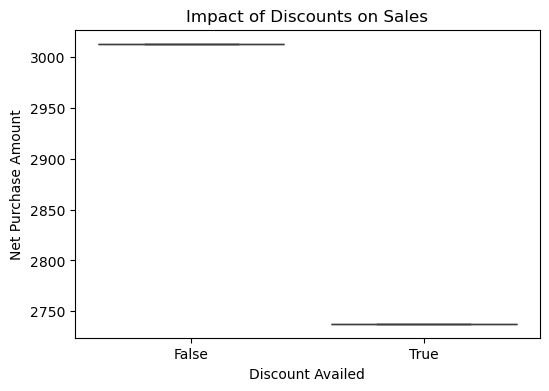

In [17]:
#Do discounts impact the purchasing behavior significantly?
plt.figure(figsize=(6,4))

a = sns.boxplot(discounted_sales, x='discount availed', y='net amount')
plt.title('Impact of Discounts on Sales')
plt.xlabel('Discount Availed')
plt.ylabel('Net Purchase Amount')

plt.show()

In [19]:
#Which time of year shows peak sales activity?
monthly_sales = ecommerce.groupby(ecommerce['purchase date'].dt.month)['net amount'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(by = ['purchase date'], ascending = True)
monthly_sales

,purchase date,net amount
0,1,1.202647e+07
1,2,1.000025e+07
2,3,1.255316e+07
3,4,1.301843e+07
4,5,1.319709e+07
5,6,1.132360e+07
6,7,1.184880e+07
7,8,1.321897e+07
8,9,1.321861e+07
9,10,1.402244e+07


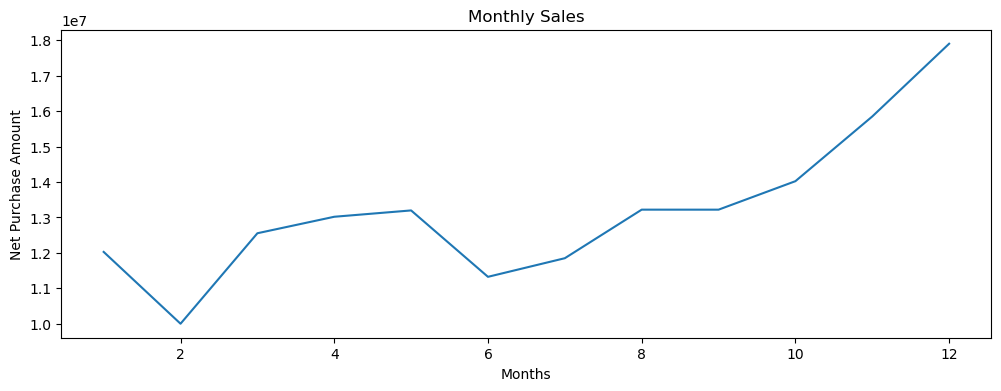

In [29]:
#plot the mouthly sales using a line plot with markers.
monthly_sales = ecommerce.groupby(ecommerce['purchase date'].dt.month)['net amount'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(by = ['purchase date'], ascending = True)

plt.figure(figsize=(12,4))

a = sns.lineplot(monthly_sales, x='purchase date', y='net amount', markers = 'o')
plt.title('Monthly Sales')
plt.xlabel('Months')
plt.ylabel('Net Purchase Amount')

plt.show()

# What is the most popular purchase method?

In [35]:
popular_purchase_method = ecommerce['purchase method'].value_counts()
popular_purchase_method

purchase method
Credit Card           22096
Debit Card            13809
Net Banking            5485
International Card     2815
Cash on Delivery       2768
PhonePe UPI            2683
Paytm UPI              2674
Google Pay UPI         2670
Name: count, dtype: int64

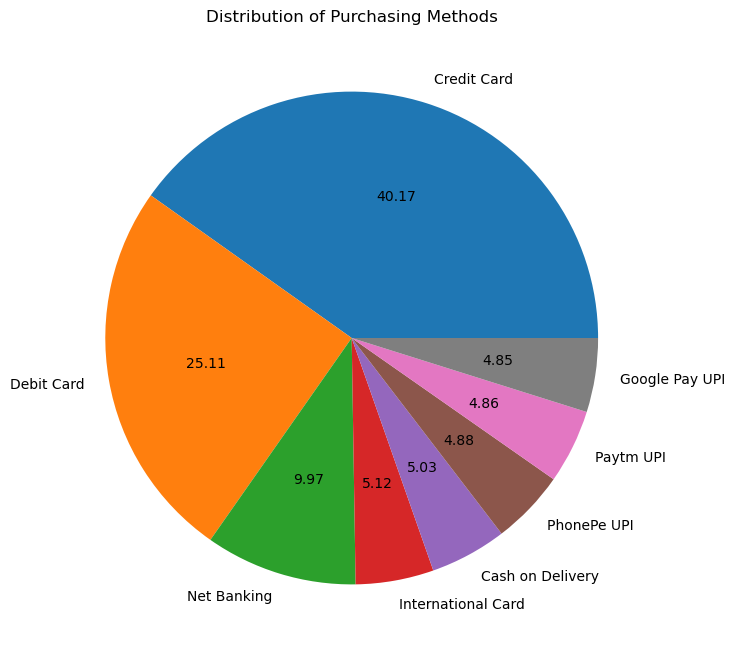

In [37]:
popular_purchase_method = ecommerce['purchase method'].value_counts()

plt.figure(figsize = (8,8))
plt.pie(popular_purchase_method, labels= popular_purchase_method.index, autopct = '%.2f')
plt.title('Distribution of Purchasing Methods')
plt.show()